In [1]:
#Importing the basic liberaries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

#### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [2]:
#loading the dataset
dict_df = pd.read_excel("Election_Data.xlsx", sheet_name=["Sheet1", "Election_Dataset_Two Classes"])
df = dict_df.get("Election_Dataset_Two Classes")

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
#Printing the number of rows and columns in the dataset
print("Total number of rows in the dataset is: {}".format(df.shape[0]))
print("Total number of columns in the dataset is: {}".format(df.shape[1]))

Total number of rows in the dataset is: 1525
Total number of columns in the dataset is: 10


In [5]:
#Lets drop the Unnamed: 0 column which does not contribute to our dataset
df = df.drop("Unnamed: 0", axis = 1)

In [6]:
#Lets check the basic info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


- Attributes like economic.cond.national, economic.cond.household, Blair, Hague,  and political.knowledge are integer type in our dataset but they should be converted into categorical since they show different levels of assesment, sentiment and knowledge

In [7]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [8]:
df[['economic.cond.national', 'economic.cond.household','Blair', 'Hague',  'political.knowledge']]=df[['economic.cond.national', 'economic.cond.household','Blair', 'Hague',  'political.knowledge']].astype("object")

In [9]:
#Checking the datatype after conversion of above attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(2), object(7)
memory usage: 107.4+ KB


In [10]:
#Checking the description of the data
df.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,5.0,3.0,607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economic.cond.household,1525.0,5.0,3.0,648.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blair,1525.0,5.0,4.0,836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hague,1525.0,5.0,2.0,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,4.0,2.0,782.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Lets check how many missing values we have in data
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
#Lets check the duplicates 
print("Number of Duplciated rows: {}".format(df.duplicated().sum()))

Number of Duplciated rows: 8


In [13]:
print("Number of Duplciated rows: {}".format(df.duplicated().sum()))

Number of Duplciated rows: 8


In [14]:
df=df.drop_duplicates()

In [15]:
#lets take out the list of our object type variables 
cat=[]
for i in df.columns:
    if df[i].dtype =="object":
        cat.append(df[i].name)

In [16]:
for i in df[cat]:
    print(i.upper(),"\n",df[i].value_counts(ascending = False, normalize = True))
    print("\n")

VOTE 
 Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64


ECONOMIC.COND.NATIONAL 
 3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic.cond.national, dtype: float64


ECONOMIC.COND.HOUSEHOLD 
 3    0.425181
4    0.286750
2    0.184575
5    0.060646
1    0.042848
Name: economic.cond.household, dtype: float64


BLAIR 
 4    0.549110
2    0.286091
5    0.100198
1    0.063942
3    0.000659
Name: Blair, dtype: float64


HAGUE 
 2    0.406724
4    0.367172
1    0.153593
5    0.048121
3    0.024390
Name: Hague, dtype: float64


POLITICAL.KNOWLEDGE 
 2    0.511536
0    0.299275
3    0.164140
1    0.025049
Name: political.knowledge, dtype: float64


GENDER 
 female    0.53263
male      0.46737
Name: gender, dtype: float64




#### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.


In [17]:
#Checking the null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [18]:
#Checking the data types
df.dtypes

vote                       object
age                         int64
economic.cond.national     object
economic.cond.household    object
Blair                      object
Hague                      object
Europe                      int64
political.knowledge        object
gender                     object
dtype: object

In [19]:
#Printing the number of rows and columns in the dataset
print("Total number of rows in the dataset is: {}".format(df.shape[0]))
print("Total number of columns in the dataset is: {}".format(df.shape[1]))

Total number of rows in the dataset is: 1517
Total number of columns in the dataset is: 9


#### Univariate Analysis 

Text(0.5, 1.0, 'fig :1: Histogram: Age')

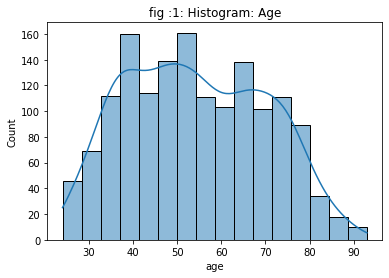

In [20]:
# "Age" 
#Histogram
sns.histplot(df["age"], kde =True)
plt.title("Histogram: Age")
plt.title("fig :1: Histogram: Age")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'fig :2: Boxplot: Age')

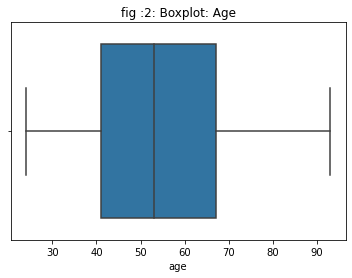

In [21]:
# "Age" 
#Boxplot
sns.boxplot(df["age"])
plt.title("fig :2: Boxplot: Age")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


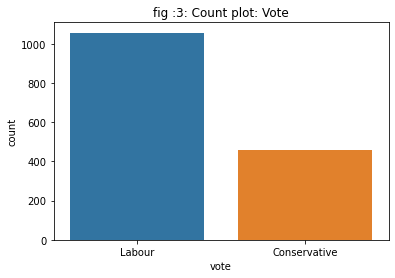

In [22]:
#Vote
sns.countplot(df["vote"])
plt.title("fig :3: Count plot: Vote");

In [23]:
df["vote"].value_counts(normalize = True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


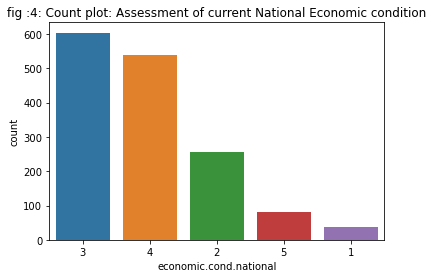

In [24]:
#economic.cond.national
sns.countplot(df["economic.cond.national"], order = df["economic.cond.national"].value_counts(ascending = False).index)
plt.title("fig :4: Count plot: Assessment of current National Economic condition");

In [25]:
df["economic.cond.national"].value_counts(normalize = True)

3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic.cond.national, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


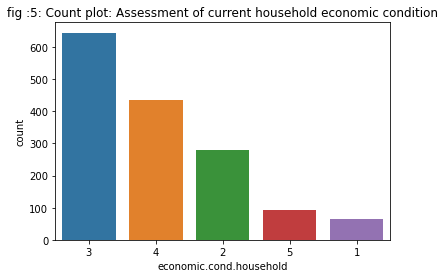

In [26]:
#Assessment of current household economic condition: economic.cond.household
sns.countplot(df["economic.cond.household"], order = df["economic.cond.household"].value_counts(ascending = False).index)
plt.title("fig :5: Count plot: Assessment of current household economic condition");

In [27]:
df["economic.cond.household"].value_counts(normalize = True)

3    0.425181
4    0.286750
2    0.184575
5    0.060646
1    0.042848
Name: economic.cond.household, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


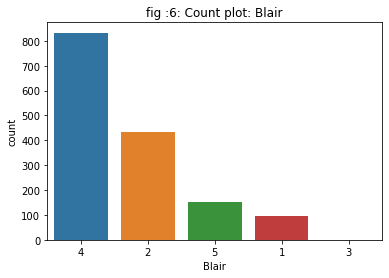

In [28]:
#Blair: Assessment of the Labour Leader
sns.countplot(df["Blair"], 
              order = df["Blair"].value_counts(ascending = False).index)
plt.title("fig :6: Count plot: Blair");

In [29]:
df["Blair"].value_counts(normalize = True)

4    0.549110
2    0.286091
5    0.100198
1    0.063942
3    0.000659
Name: Blair, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


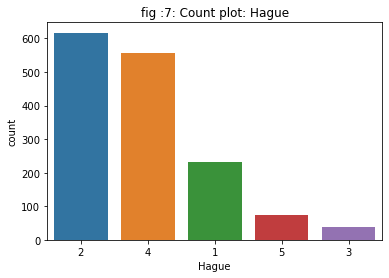

In [30]:
#Hague
sns.countplot(df["Hague"], 
              order = df["Hague"].value_counts(ascending = False).index)
plt.title("fig :7: Count plot: Hague");

In [31]:
df["Hague"].value_counts(normalize = True)

2    0.406724
4    0.367172
1    0.153593
5    0.048121
3    0.024390
Name: Hague, dtype: float64

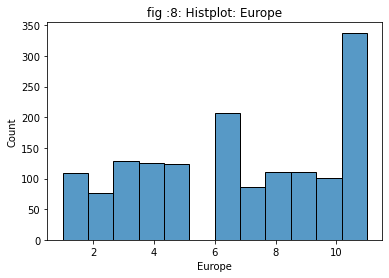

In [32]:
#Europe
sns.histplot(df["Europe"])
plt.title("fig :8: Histplot: Europe");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


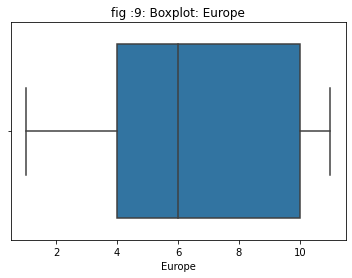

In [33]:
sns.boxplot(df["Europe"])
plt.title("fig :9: Boxplot: Europe");

In [34]:
df["Europe"].value_counts(normalize = True)

11    0.222808
6     0.136454
3     0.084377
4     0.083059
5     0.081081
9     0.073171
8     0.073171
1     0.071852
10    0.066579
7     0.056691
2     0.050758
Name: Europe, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


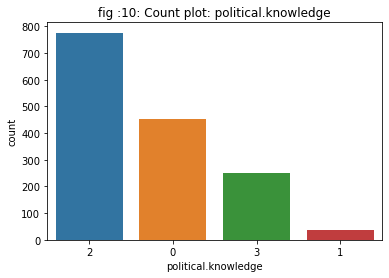

In [35]:
#political.knowledge
sns.countplot(df["political.knowledge"], 
              order = df["political.knowledge"].value_counts(ascending = False).index)
plt.title("fig :10: Count plot: political.knowledge");

In [36]:
df["political.knowledge"].value_counts(normalize = True)

2    0.511536
0    0.299275
3    0.164140
1    0.025049
Name: political.knowledge, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


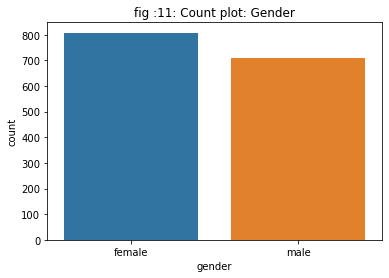

In [37]:
#Gender
sns.countplot(df["gender"], 
              order = df["gender"].value_counts(ascending = False).index)
plt.title("fig :11: Count plot: Gender");

In [38]:
df["gender"].value_counts(normalize = True)

female    0.53263
male      0.46737
Name: gender, dtype: float64

#### Bivariate Analysis

Text(0.5, 1.0, 'Fig :12: Boxplot of Age for different levels of votes')

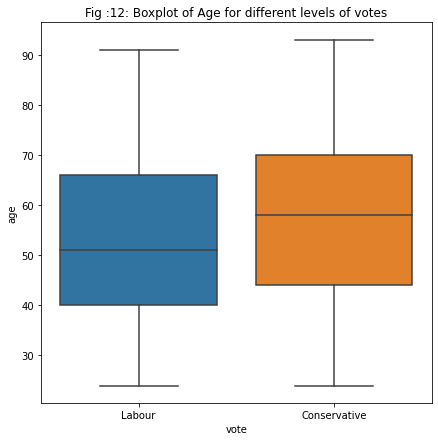

In [39]:
#Looking at the boxplot of Age with hue as "Vote"
plt.figure(figsize=(7,7))
sns.boxplot(y=df["age"], x=df["vote"])
plt.title("Fig :12: Boxplot of Age for different levels of votes")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


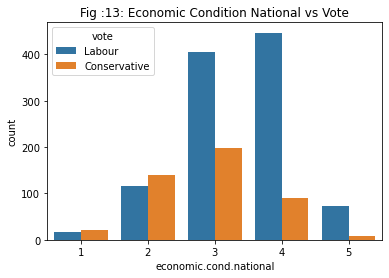

In [40]:
#Economic Condition National VS vote

sns.countplot(df["economic.cond.national"], hue=df["vote"], saturation=0.75);
plt.title("Fig :13: Economic Condition National vs Vote");

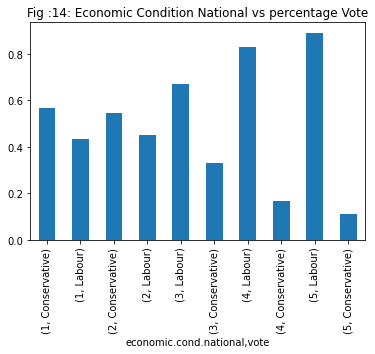

In [41]:
df.groupby("economic.cond.national")["vote"].value_counts(normalize = True, ascending = False).plot(kind="bar")
plt.title("Fig :14: Economic Condition National vs percentage Vote");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


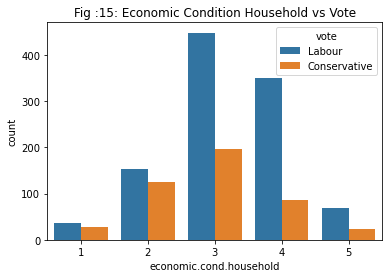

In [42]:
#'economic.cond.household' vs Vote
sns.countplot(df["economic.cond.household"], hue=df["vote"], saturation=0.75);
plt.title("Fig :15: Economic Condition Household vs Vote");


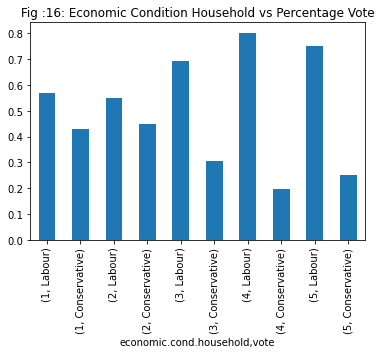

In [43]:
df.groupby("economic.cond.household")["vote"].value_counts(normalize = True, ascending = False).plot(kind="bar")
plt.title("Fig :16: Economic Condition Household vs Percentage Vote");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


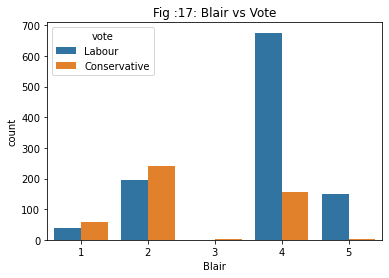

In [44]:
#Blair VS vote
sns.countplot(df["Blair"], hue=df["vote"], saturation=0.75);
plt.title("Fig :17: Blair vs Vote");

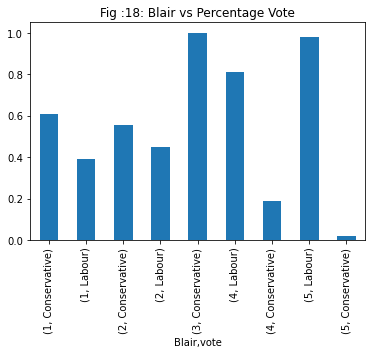

In [45]:
df.groupby("Blair")["vote"].value_counts(normalize = True, ascending = False).plot(kind="bar")
plt.title("Fig :18: Blair vs Percentage Vote");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


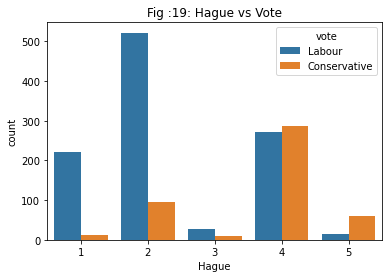

In [46]:
#Hague VS vote
sns.countplot(df["Hague"], hue=df["vote"], saturation=0.75);
plt.title("Fig :19: Hague vs Vote");

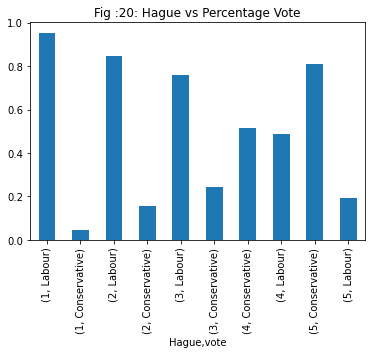

In [47]:
df.groupby("Hague")["vote"].value_counts(normalize = True, ascending = False).plot(kind="bar")
plt.title("Fig :20: Hague vs Percentage Vote");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


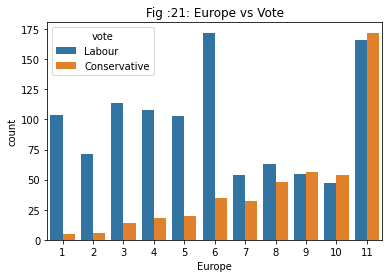

In [48]:
#Europe VS vote
sns.countplot(df["Europe"], hue=df["vote"], saturation=0.75);
plt.title("Fig :21: Europe vs Vote");

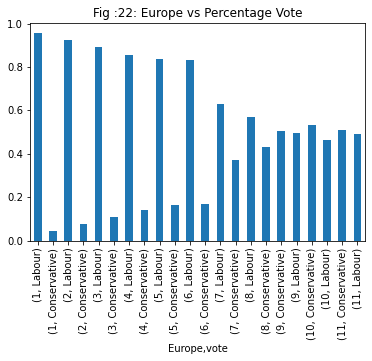

In [49]:
df.groupby("Europe")["vote"].value_counts(normalize = True, ascending = False).plot(kind="bar")
plt.title("Fig :22: Europe vs Percentage Vote");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


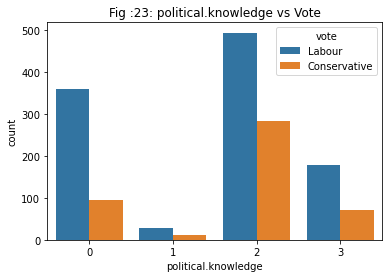

In [50]:
#political.knowledge VS vote
sns.countplot(df["political.knowledge"], hue=df["vote"], saturation=0.75);
plt.title("Fig :23: political.knowledge vs Vote");

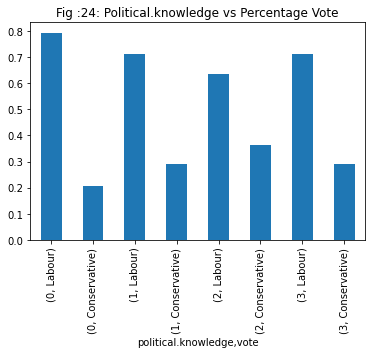

In [51]:
df.groupby("political.knowledge")["vote"].value_counts(normalize = True, ascending = False).plot(kind="bar")
plt.title("Fig :24: Political.knowledge vs Percentage Vote");

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


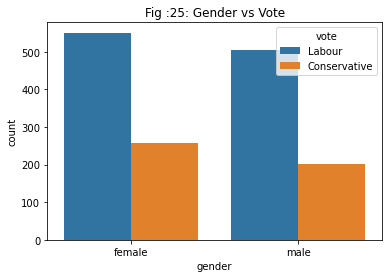

In [52]:
#Gender VS vote
sns.countplot(df["gender"], hue=df["vote"], saturation=0.75);
plt.title("Fig :25: Gender vs Vote");

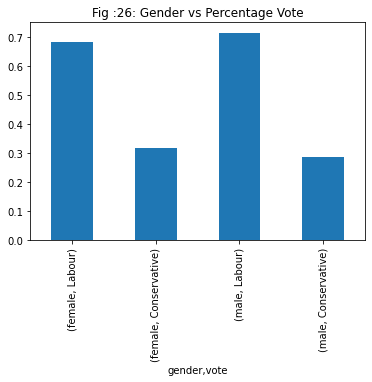

In [53]:
df.groupby("gender")["vote"].value_counts(normalize = True, ascending = False).plot(kind="bar")
plt.title("Fig :26: Gender vs Percentage Vote");

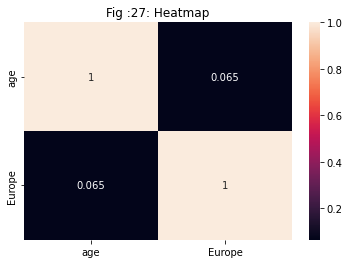

In [54]:
sns.heatmap(df.corr(), annot = True)
plt.title("Fig :27: Heatmap");

In [55]:
#Outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


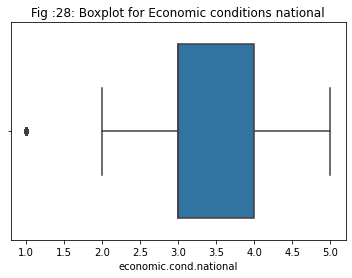

In [56]:
sns.boxplot(df["economic.cond.national"])
plt.title("Fig :28: Boxplot for Economic conditions national");

In [57]:
df["economic.cond.national"].value_counts(normalize = True)


3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic.cond.national, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


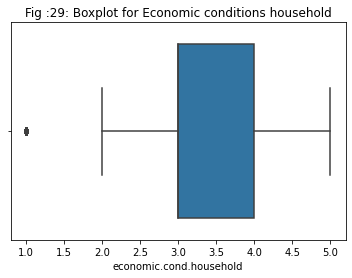

In [58]:
sns.boxplot(df["economic.cond.household"])
plt.title("Fig :29: Boxplot for Economic conditions household");

In [59]:
df["economic.cond.household"].value_counts(normalize = True)

3    0.425181
4    0.286750
2    0.184575
5    0.060646
1    0.042848
Name: economic.cond.household, dtype: float64

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [60]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   object
 3   economic.cond.household  1517 non-null   object
 4   Blair                    1517 non-null   object
 5   Hague                    1517 non-null   object
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   object
 8   gender                   1517 non-null   object
dtypes: int64(2), object(7)
memory usage: 118.5+ KB


In [62]:
#Converting ordinal data types into numerical variables 

ordinal = ['economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']

df[ordinal]= df[ordinal].astype("int64")

In [63]:
df["vote"]=pd.Categorical(df["vote"])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   category
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   int64   
 3   economic.cond.household  1517 non-null   int64   
 4   Blair                    1517 non-null   int64   
 5   Hague                    1517 non-null   int64   
 6   Europe                   1517 non-null   int64   
 7   political.knowledge      1517 non-null   int64   
 8   gender                   1517 non-null   object  
dtypes: category(1), int64(7), object(1)
memory usage: 108.3+ KB


In [65]:
#Encoding the object type nominal data
dum = [ "gender"]
df=pd.get_dummies(df, columns=dum, drop_first =True)

In [66]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender_male,1517.0,0.467370,0.499099,0.0,0.0,0.0,1.0,1.0


In [68]:
#We will need to scale the data
from scipy.stats import zscore

In [69]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender_male'],
      dtype='object')

In [70]:
#Scaling
num = ['age', 'Europe']
df[num]=df[num].apply(zscore)

In [71]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,-0.716161,3,3,4,1,-1.437338,2,0
1,Labour,-1.162118,4,4,4,4,-0.527684,2,1
2,Labour,-1.225827,4,4,5,2,-1.134120,2,1
3,Labour,-1.926617,4,2,2,1,-0.830902,0,0
4,Labour,-0.843577,2,2,1,1,-0.224465,2,1


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,1.917458e-17,1.000330,-1.926617,-0.843577,-0.079079,0.812836,2.469250
economic.cond.national,1517.0,3.245221e+00,0.881792,1.000000,3.000000,3.000000,4.000000,5.000000
economic.cond.household,1517.0,3.137772e+00,0.931069,1.000000,3.000000,3.000000,4.000000,5.000000
Blair,1517.0,3.335531e+00,1.174772,1.000000,2.000000,4.000000,4.000000,5.000000
Hague,1517.0,2.749506e+00,1.232479,1.000000,2.000000,2.000000,4.000000,5.000000
Europe,1517.0,6.293947e-17,1.000330,-1.740556,-0.830902,-0.224465,0.988407,1.291625
political.knowledge,1517.0,1.540541e+00,1.084417,0.000000,0.000000,2.000000,2.000000,3.000000
gender_male,1517.0,4.673698e-01,0.499099,0.000000,0.000000,0.000000,1.000000,1.000000


In [73]:
#Splitting the train and test
X = df.drop("vote", axis = 1)
Y = df["vote"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [74]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
991,-1.289535,2,4,1,4,1.291625,2,0
1274,-0.907286,4,3,4,4,-0.224465,0,1
649,0.430587,4,3,4,4,0.078753,2,0
677,-0.461328,3,3,4,2,1.291625,0,1
538,-0.652453,5,3,4,2,0.381971,0,1


In [75]:
X_test.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
504,1.067669,3,3,2,2,0.381971,2,0
369,-0.716161,3,2,4,2,0.381971,3,1
1075,2.214417,5,5,5,2,-1.740556,2,1
1031,-0.461328,2,3,2,4,0.381971,2,0
1329,-1.353243,5,4,4,4,0.381971,0,1


In [76]:
y_train.head()

991     Conservative
1274          Labour
649     Conservative
677           Labour
538           Labour
Name: vote, dtype: category
Categories (2, object): ['Conservative', 'Labour']

In [77]:
y_test.head()

504           Labour
369           Labour
1075          Labour
1031    Conservative
1329          Labour
Name: vote, dtype: category
Categories (2, object): ['Conservative', 'Labour']

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)


## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [79]:
model_log = LogisticRegression(random_state=1, C=10)

In [80]:
model_log.fit(X_train,y_train)

LogisticRegression(C=10, random_state=1)

In [81]:
train_score_log=model_log.score(X_train, y_train)
print(train_score_log)

0.8312912346842601


In [82]:
y_pred = model_log.predict(X_test)

In [83]:
test_score_log=model_log.score(X_test, y_test)
print(test_score_log)

0.8355263157894737


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


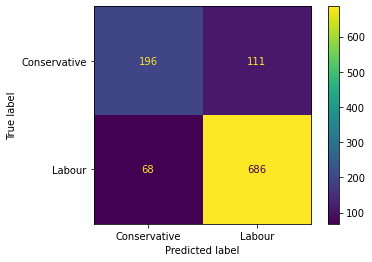

In [84]:
#Confusion Matrix for training data for logistic regression
plot_confusion_matrix(model_log,X_train,y_train)


In [85]:
#Classification report for training data for logistic regression
print(classification_report(y_train,model_log.predict(X_train)))

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.69       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


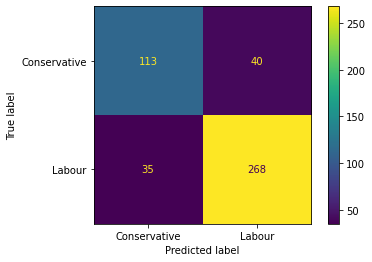

In [86]:
#Confusion matrix for testing data for logistic regression
plot_confusion_matrix(model_log,X_test,y_test)


In [87]:
#Classification report for testing data for logistic regression
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

Conservative       0.76      0.74      0.75       153
      Labour       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [88]:
from sklearn.preprocessing import label_binarize
y_train_bin = label_binarize(y_train, classes =np.unique(y_train))
y_test_bin = label_binarize(y_test, classes =np.unique(y_test))

AUC: 0.890


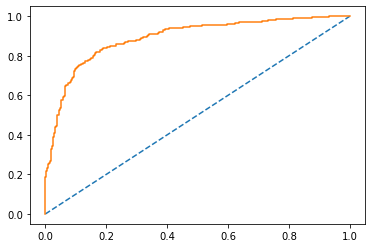

In [89]:
from sklearn.metrics import roc_auc_score,roc_curve

#AUC ROC Curve for training data for model_log

# predict probabilities
probs = model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.883


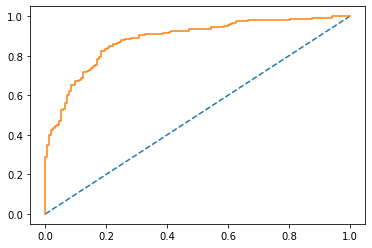

In [90]:
#AUC ROC Curve for testing data for model_log

# predict probabilities
probs = model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [91]:
model_log.coef_

array([[-0.23518302,  0.63662633,  0.06141713,  0.60427761, -0.82881718,
        -0.69783141, -0.32488388,  0.1984305 ]])

<AxesSubplot:>

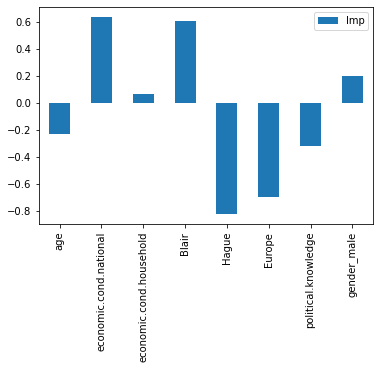

In [92]:
pd.DataFrame(model_log.coef_.T, columns=["Imp"], index=X_train.columns).plot(kind="bar")


## Linear Discriminant Analysis  (LDA)

In [93]:
model_lda = LinearDiscriminantAnalysis()

In [94]:
model_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [95]:
train_score_lda=model_lda.score(X_train, y_train)
print(train_score_lda)

0.8341187558906692


In [96]:
test_score_lda=model_lda.score(X_test, y_test)
print(test_score_lda)

0.8333333333333334


In [97]:
y_pred = model_lda.predict(X_test)

In [98]:
accuracy = {"Train_accuracy": [train_score_log,train_score_lda],
"Test_accuracy": [test_score_log, test_score_lda]}

In [99]:
pd.DataFrame(data=accuracy, index=["Logistic Regression", "LDA"])

,Train_accuracy,Test_accuracy
Logistic Regression,0.831291,0.835526
LDA,0.834119,0.833333


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


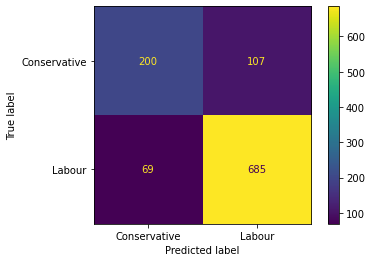

In [100]:
#training
plot_confusion_matrix(model_lda,X_train,y_train)


In [101]:
#training
print(classification_report(y_train,model_lda.predict(X_train)))

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


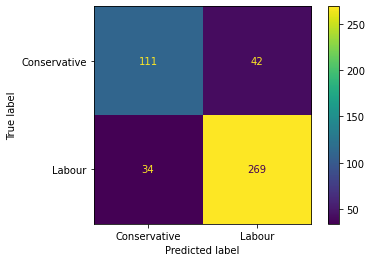

In [102]:
#Testing
plot_confusion_matrix(model_lda,X_test,y_test)


In [103]:
#Testing
print(classification_report(y_test,model_lda.predict(X_test)))

              precision    recall  f1-score   support

Conservative       0.77      0.73      0.74       153
      Labour       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.889


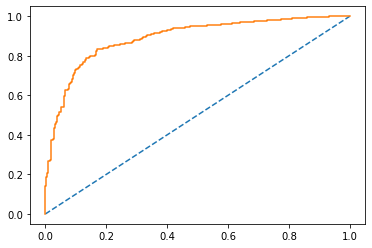

In [104]:
#AUC ROC Curve for training data for model_lda

# predict probabilities
probs = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC: 0.888


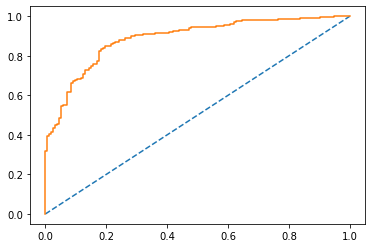

In [105]:
#AUC ROC Curve for testing data for model_lda

# predict probabilities
probs = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [106]:
model_lda.coef_

array([[-0.31451283,  0.60492045,  0.05006905,  0.74240039, -0.92663438,
        -0.73746224, -0.43033484,  0.14907998]])

<AxesSubplot:>

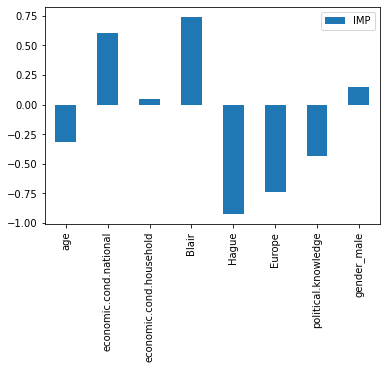

In [107]:
pd.DataFrame(model_lda.coef_.T, columns=["IMP"], index=X_train.columns).plot(kind="bar")


### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

#### KNN Model

In [108]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier(n_neighbors=10)
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [109]:
train_score_knn = model_KNN.score(X_train,y_train)
print(train_score_knn)

0.8435438265786993


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


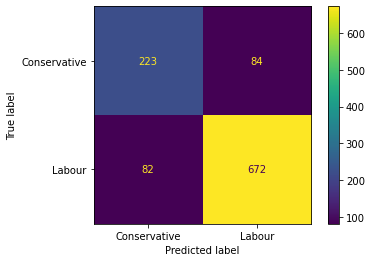

In [110]:
plot_confusion_matrix(model_KNN, X_train, y_train)


In [111]:
#Classification report Training
print(classification_report(y_train, model_KNN.predict(X_train)))

              precision    recall  f1-score   support

Conservative       0.73      0.73      0.73       307
      Labour       0.89      0.89      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [112]:
y_pred = model_KNN.predict(X_test)

In [113]:
test_score_knn = model_KNN.score(X_test, y_test)
print(test_score_knn)

0.8399122807017544


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


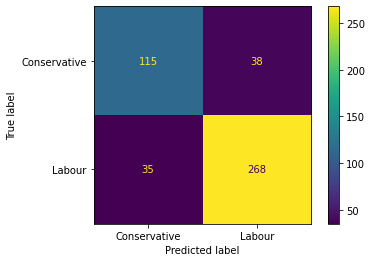

In [114]:
plot_confusion_matrix(model_KNN, X_test, y_test)

In [115]:
#Classification report Testing
print(classification_report(y_test, model_KNN.predict(X_test)))

              precision    recall  f1-score   support

Conservative       0.77      0.75      0.76       153
      Labour       0.88      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.82      0.82       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.913


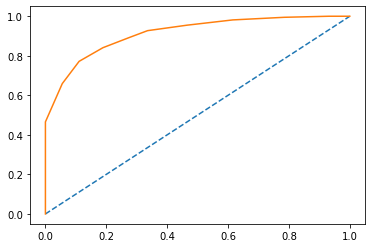

In [116]:
#AUC ROC Curve for training data for model_KNN

# predict probabilities
probs = model_KNN.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.900


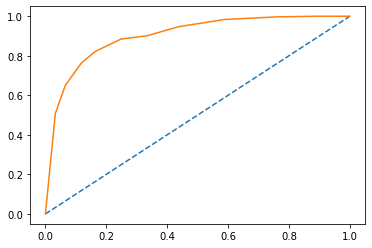

In [117]:
#AUC ROC Curve for testing data for model_KNN

# predict probabilities
probs = model_KNN.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Naïve Bayes Model 

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
model_NB = GaussianNB()

In [120]:
model_NB.fit(X_train, y_train)

GaussianNB()

In [121]:
train_score_nb = model_NB.score(X_train,y_train)
print(train_score_nb)

0.8350612629594723


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


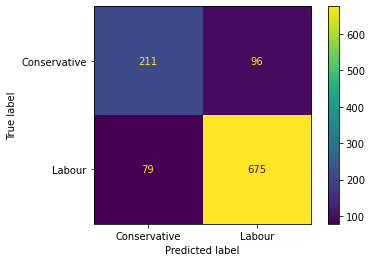

In [122]:
plot_confusion_matrix(model_NB, X_train, y_train)

In [123]:
#Classification Report on training data
print(classification_report(y_train, model_NB.predict(X_train)))

              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [124]:
test_score_nb = model_NB.score(X_test, y_test)
print(test_score_nb)

0.8223684210526315


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


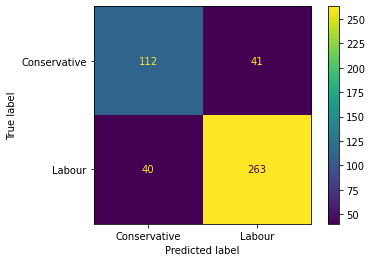

In [125]:
plot_confusion_matrix(model_NB, X_test,y_test)

In [126]:
#Classification Report on Testing data
print(classification_report(y_test, model_NB.predict(X_test)))

              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.888


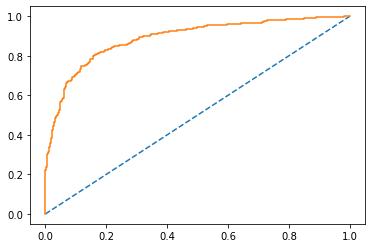

In [127]:
#AUC ROC Curve for training data for model_NB

# predict probabilities
probs = model_NB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.876


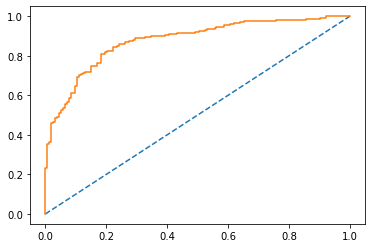

In [128]:
#AUC ROC Curve for testing data for model_NB

# predict probabilities
probs = model_NB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [129]:
accuracy = {"Train_accuracy": [train_score_log,train_score_lda,train_score_knn,train_score_nb],
"Test_accuracy": [test_score_log, test_score_lda,test_score_knn, test_score_nb]}

In [130]:
df_model_scores=pd.DataFrame(data=accuracy, index=["Logistic Regression", "LDA", "KNN", "NB"])

In [131]:
df_model_scores

,Train_accuracy,Test_accuracy
Logistic Regression,0.831291,0.835526
LDA,0.834119,0.833333
KNN,0.843544,0.839912
NB,0.835061,0.822368


### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

#### Since we have class imbalance, lets apply SMOTE on our training data and see if we get better results in our tuned models.

In [132]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [133]:
#Lets check our accuracy score for basic models 

training_accuracy=[]
testing_accuracy=[]

models =[model_log, model_lda, model_KNN, model_NB]

for model in models:
    model.fit(X_train_res,y_train_res)
    training_accuracy.append(model.score(X_train_res,y_train_res))
    testing_accuracy.append(model.score(X_test,y_test))

In [134]:
#training_accuracy

In [135]:
accuracy = {"Train_accuracy": [train_score_log,train_score_lda,train_score_knn,train_score_nb, training_accuracy[0],training_accuracy[1],training_accuracy[2],training_accuracy[3]],
"Test_accuracy": [test_score_log, test_score_lda,test_score_knn, test_score_nb, testing_accuracy[0],testing_accuracy[1],testing_accuracy[2],testing_accuracy[3]]}

In [136]:
#accuracy

In [137]:
model_names = ["Logistic Regression", "LDA", "KNN", "NB", "SMOTE_Logistic", "SMOTE_LDA", "SMOTE_KNN", "SMOTE_NB"]
pd.DataFrame(data=accuracy, index=model_names)

,Train_accuracy,Test_accuracy
Logistic Regression,0.831291,0.835526
LDA,0.834119,0.833333
KNN,0.843544,0.839912
NB,0.835061,0.822368
SMOTE_Logistic,0.822944,0.804825
SMOTE_LDA,0.824271,0.807018
SMOTE_KNN,0.854111,0.798246
SMOTE_NB,0.810345,0.807018


### Bagging model

In [138]:
#Cart
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()

cart.fit(X_train,y_train)

DecisionTreeClassifier()

In [139]:
## Performance Matrix on train data set
y_train_predict = cart.predict(X_train)
model_score =cart.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       307
      Labour       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [140]:
## Performance Matrix on test data set
y_test_predict = cart.predict(X_test)
model_score = cart.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.7807017543859649
[[103  50]
 [ 50 253]]
              precision    recall  f1-score   support

Conservative       0.67      0.67      0.67       153
      Labour       0.83      0.83      0.83       303

    accuracy                           0.78       456
   macro avg       0.75      0.75      0.75       456
weighted avg       0.78      0.78      0.78       456



In [141]:
#BAGGING classifier
from sklearn.ensemble import BaggingClassifier
Bagging_model=BaggingClassifier(n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=1)

In [142]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       307
      Labour       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


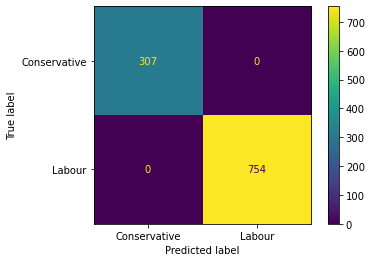

In [143]:
#Confusion Matrix plot for training data for bagging model
plot_confusion_matrix(Bagging_model, X_train, y_train)

AUC: 1.000


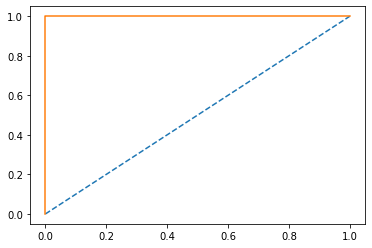

In [144]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [145]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

Conservative       0.74      0.71      0.72       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


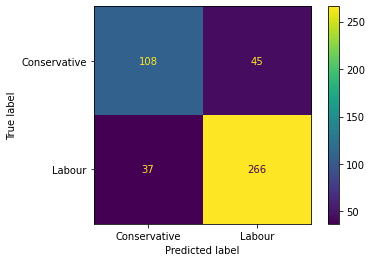

In [146]:
plot_confusion_matrix(Bagging_model, X_test, y_test)

AUC: 0.882


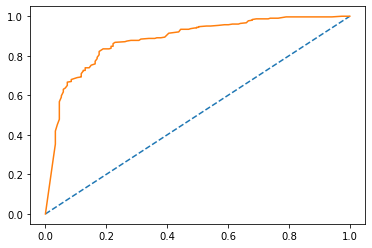

In [147]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Tunning Bagging Model

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
Bagging_model=BaggingClassifier(n_estimators=100,random_state=1)


In [150]:
grid_bag = {"base_estimator": [model_log, model_lda, model_KNN, model_NB, cart],
           "n_estimators": [5,10,15],
           }

In [151]:
grid_search_bag = GridSearchCV(estimator = Bagging_model, param_grid = grid_bag, cv = 3,n_jobs=-1,scoring='accuracy')

In [152]:
grid_search_bag.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(n_estimators=100, random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator': [LogisticRegression(C=10,
                                                               random_state=1),
                                            LinearDiscriminantAnalysis(),
                                            KNeighborsClassifier(n_neighbors=10),
                                            GaussianNB(),
                                            DecisionTreeClassifier()],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [153]:
grid_search_bag.best_params_

{'base_estimator': LogisticRegression(C=10, random_state=1),
 'n_estimators': 15}

In [154]:
tunned_bag=grid_search_bag.best_estimator_

In [155]:
## Performance Matrix on train data set
y_train_predict = tunned_bag.predict(X_train)
model_score = tunned_bag.score(X_train, y_train)
print(model_score)
print(classification_report(y_train, y_train_predict))

0.8341187558906692
              precision    recall  f1-score   support

Conservative       0.76      0.63      0.69       307
      Labour       0.86      0.92      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


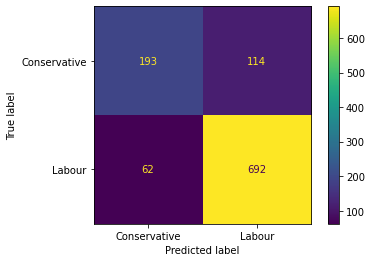

In [156]:
plot_confusion_matrix(tunned_bag, X_train, y_train)

AUC: 0.890


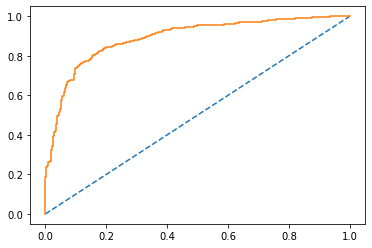

In [157]:
# predict probabilities
probs = tunned_bag.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [158]:
## Performance Matrix on test data set
y_test_predict = tunned_bag.predict(X_test)
model_score = tunned_bag.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8267543859649122
[[109  44]
 [ 35 268]]
              precision    recall  f1-score   support

Conservative       0.76      0.71      0.73       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


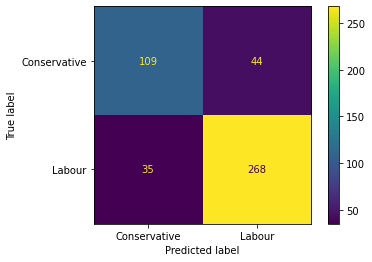

In [159]:
plot_confusion_matrix(tunned_bag, X_test, y_test)

AUC: 0.881


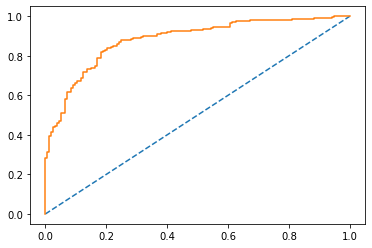

In [160]:
# predict probabilities
probs = tunned_bag.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### BOOSTING- ADA boosting

In [161]:
#Ada Boosting

from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [162]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(classification_report(y_train, y_train_predict))

0.8501413760603205
              precision    recall  f1-score   support

Conservative       0.76      0.70      0.73       307
      Labour       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


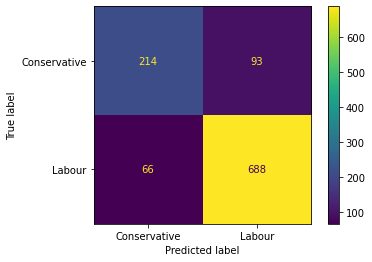

In [163]:
plot_confusion_matrix(ADB_model, X_train, y_train)

AUC: 0.915


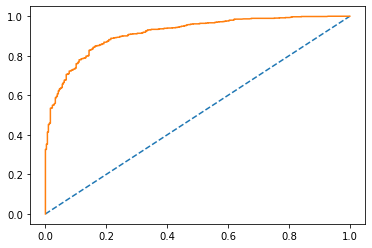

In [164]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [165]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(classification_report(y_test, y_test_predict))

0.8135964912280702
              precision    recall  f1-score   support

Conservative       0.75      0.67      0.71       153
      Labour       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


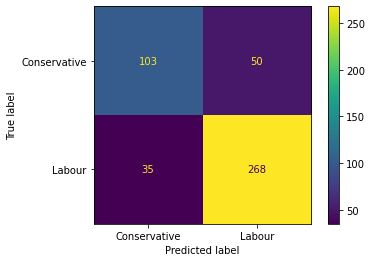

In [166]:
plot_confusion_matrix(ADB_model, X_test, y_test)

AUC: 0.877


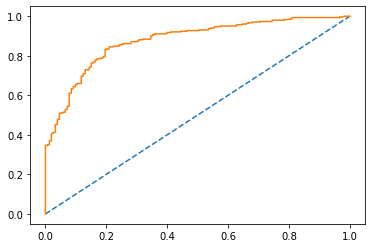

In [167]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [168]:
ADB_model.feature_importances_

array([0.59, 0.03, 0.05, 0.07, 0.07, 0.17, 0.02, 0.  ])

<AxesSubplot:>

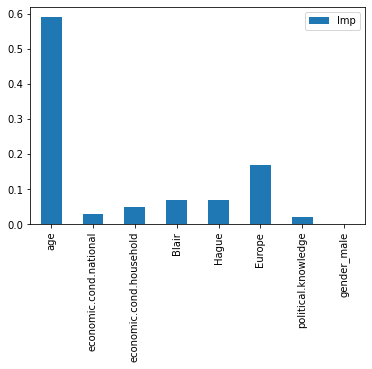

In [169]:
pd.DataFrame(ADB_model.feature_importances_.T, columns=["Imp"], index=X_train.columns).plot(kind="bar")

### Tunning ADA BOOSTING MODEL

In [170]:
grid_ADB={'n_estimators': [50,100,200,300]}

In [171]:
grid_search_ADB= GridSearchCV(estimator = ADB_model, param_grid = grid_ADB, cv = 3,n_jobs=-1,scoring='accuracy')

In [172]:
grid_search_ADB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(n_estimators=100, random_state=1),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [173]:
grid_search_ADB.best_params_

{'n_estimators': 50}

In [174]:
tunned_ADB = grid_search_ADB.best_estimator_

In [175]:
## Performance Matrix on train data set
y_train_predict = tunned_ADB.predict(X_train)
model_score = tunned_ADB.score(X_train, y_train)
print(model_score)
print(classification_report(y_train, y_train_predict))


0.8463713477851084
              precision    recall  f1-score   support

Conservative       0.76      0.68      0.72       307
      Labour       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


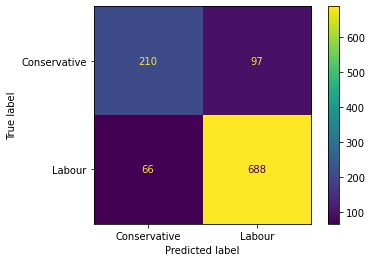

In [176]:
plot_confusion_matrix(tunned_ADB, X_train, y_train)

AUC: 0.912


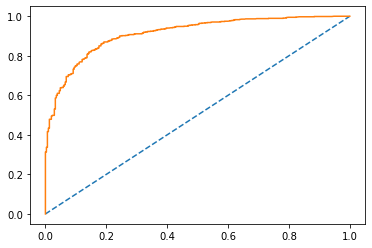

In [177]:
# predict probabilities
probs = tunned_ADB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [178]:
## Performance Matrix on test data set
y_test_predict = tunned_ADB.predict(X_test)
model_score = tunned_ADB.score(X_test, y_test)
print(model_score)
print(classification_report(y_test, y_test_predict))


0.8135964912280702
              precision    recall  f1-score   support

Conservative       0.74      0.69      0.71       153
      Labour       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


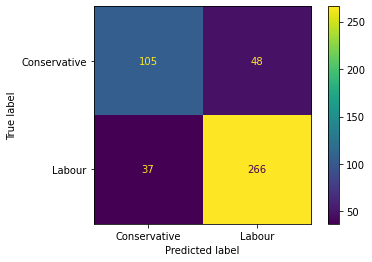

In [179]:
plot_confusion_matrix(tunned_ADB, X_test, y_test)

AUC: 0.881


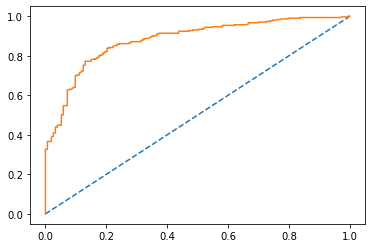

In [180]:
# predict probabilities
probs = tunned_ADB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<AxesSubplot:>

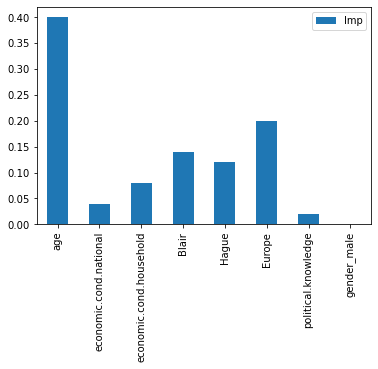

In [181]:
pd.DataFrame(tunned_ADB.feature_importances_.T, columns=["Imp"], index=X_train.columns).plot(kind="bar")

### Gradient Boosting

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [183]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(classification_report(y_train, y_train_predict))

0.8925541941564562
              precision    recall  f1-score   support

Conservative       0.84      0.78      0.81       307
      Labour       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


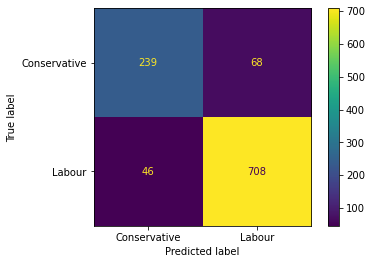

In [184]:
plot_confusion_matrix(gbcl, X_train, y_train)

AUC: 0.951


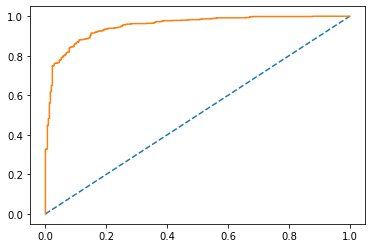

In [185]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [186]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(classification_report(y_test, y_test_predict))

0.8355263157894737
              precision    recall  f1-score   support

Conservative       0.80      0.69      0.74       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


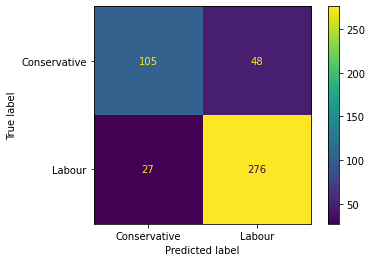

In [187]:
plot_confusion_matrix(gbcl, X_test, y_test)

AUC: 0.899


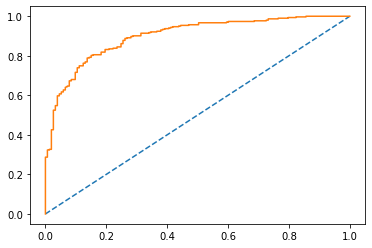

In [188]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [189]:
gbcl.feature_importances_

array([0.0972344 , 0.07661754, 0.03087567, 0.18705823, 0.34433321,
       0.17457236, 0.08682706, 0.00248154])

<AxesSubplot:>

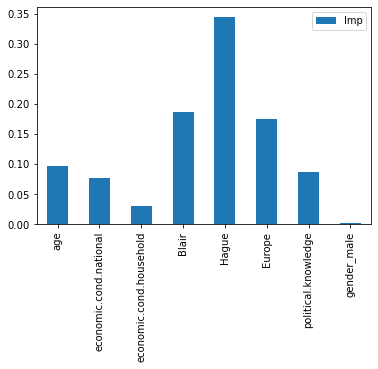

In [190]:
pd.DataFrame(gbcl.feature_importances_.T, columns=["Imp"], index=X_train.columns).plot(kind="bar")

#### TUnning grdient boosting

In [191]:
grid_GB = {"learning_rate":[0.1,0.2], 
           "min_samples_split":[7,15,30],
           "min_samples_leaf":[3,5,7],
           "max_depth":[3,5,7],
           "max_features":['auto', 'sqrt', 'log2'],
           "subsample":[0.7,0.8,1]}

In [192]:
grid_search_GB = GridSearchCV(estimator = gbcl, param_grid = grid_GB, cv = 3,n_jobs=-1,scoring='accuracy')


In [193]:
grid_search_GB.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [7, 15, 30],
                         'subsample': [0.7, 0.8, 1]},
             scoring='accuracy')

In [194]:
grid_search_GB.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'subsample': 0.8}

In [195]:
tunned_GB=grid_search_GB.best_estimator_

In [196]:
## Performance Matrix on train data set
y_train_predict = tunned_GB.predict(X_train)
model_score = tunned_GB.score(X_train, y_train)
print(model_score)
print(classification_report(y_train, y_train_predict))


0.8897266729500471
              precision    recall  f1-score   support

Conservative       0.84      0.77      0.80       307
      Labour       0.91      0.94      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


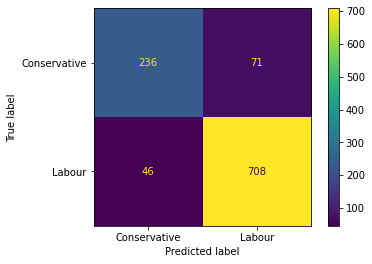

In [197]:
plot_confusion_matrix(tunned_GB, X_train, y_train)

AUC: 0.944


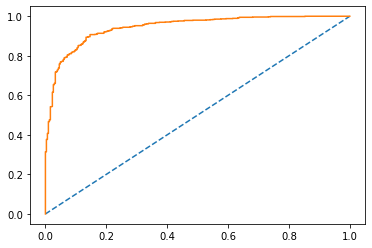

In [198]:
# predict probabilities
probs = tunned_GB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


In [199]:
## Performance Matrix on test data set
y_test_predict = tunned_GB.predict(X_test)
model_score = tunned_GB.score(X_test, y_test)
print(model_score)
print(classification_report(y_test, y_test_predict))


0.8355263157894737
              precision    recall  f1-score   support

Conservative       0.78      0.71      0.74       153
      Labour       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


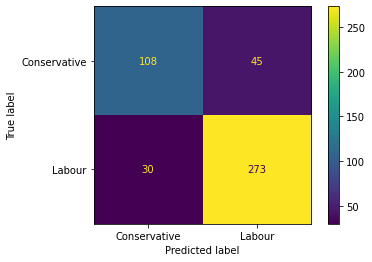

In [200]:
plot_confusion_matrix(tunned_GB, X_test, y_test)

AUC: 0.898


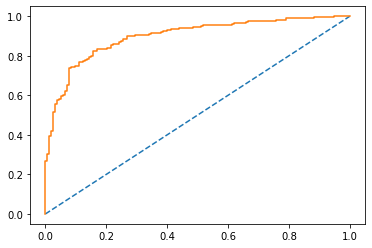

In [201]:
# predict probabilities
probs = tunned_GB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<AxesSubplot:>

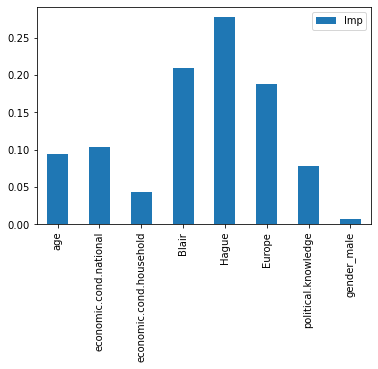

In [202]:
pd.DataFrame(tunned_GB.feature_importances_.T, columns=["Imp"], index=X_train.columns).plot(kind="bar")

#### MODEL TUNING ON Logistic Regression

In [203]:
LogisticRegression()

LogisticRegression()

In [204]:
from sklearn.model_selection import GridSearchCV

grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001],
     "C": [1,10],
     "max_iter":[100,1000]}

grid_search = GridSearchCV(estimator = model_log, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [205]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(C=10, random_state=1),
             n_jobs=-1,
             param_grid={'C': [1, 10], 'max_iter': [100, 1000],
                         'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [206]:
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}

In [207]:
#tuned log is tuned logistic Regression model
tuned_log = grid_search.best_estimator_

In [208]:
tuned_log.score(X_train,y_train)

0.8312912346842601

In [209]:
tuned_log.score(X_test,y_test)

0.8333333333333334

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


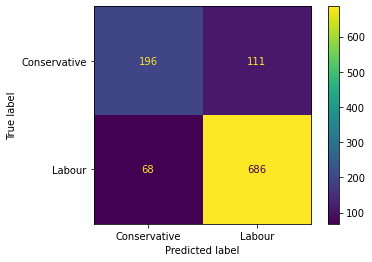

In [210]:
plot_confusion_matrix(tuned_log, X_train, y_train)

In [211]:
#Classification report on training data for tuned logistic regression model
print(classification_report(y_train, tuned_log.predict(X_train)))

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.69       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


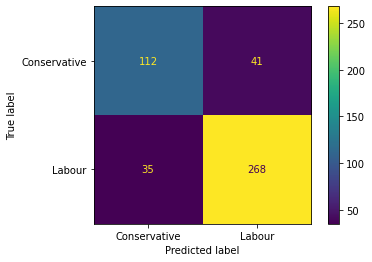

In [212]:
plot_confusion_matrix(tuned_log, X_test, y_test)

In [213]:
#Classification report on testing data for tuned logistic regression model
print(classification_report(y_test, tuned_log.predict(X_test)))

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.75       153
      Labour       0.87      0.88      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.890


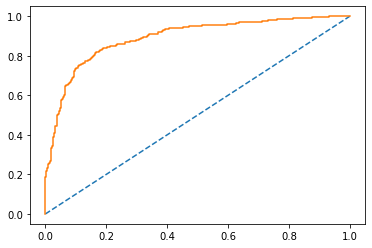

In [214]:
#AUC ROC Curve for training data for tuned_log

# predict probabilities
probs = tuned_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.883


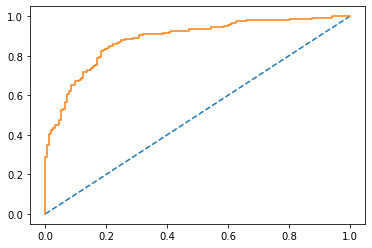

In [215]:
#AUC ROC Curve for testing data for tuned_log

# predict probabilities
probs = tuned_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [216]:
tuned_log.coef_

array([[-0.23320135,  0.6285991 ,  0.0633256 ,  0.60118654, -0.823128  ,
        -0.69171551, -0.32156148,  0.1921049 ]])

<AxesSubplot:>

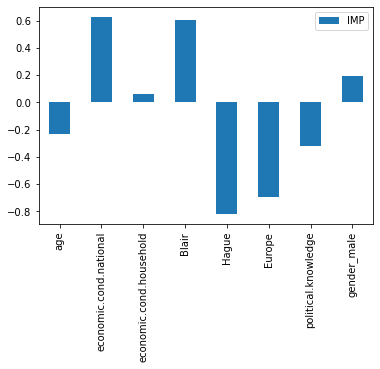

In [217]:
pd.DataFrame(tuned_log.coef_.T, columns=["IMP"], index=X_train.columns).plot(kind="bar")


### Model Tunning on LDA

In [218]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [219]:
lda_params_grid = {"solver": ['svd', 'lsqr', 'eigen']}

In [220]:
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = lda_params_grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [221]:
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [222]:
grid_search_lda.best_params_

{'solver': 'svd'}

### Model Tunning on KNN

In [223]:
knn=KNeighborsClassifier()

In [224]:
knn_grid = {"n_neighbors": [5,10,15],
           "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
           "p": [1,2,3],
           "leaf_size": [25,30,35],
           "n_jobs": [1,2,3]}

In [225]:
grid_search_knn = GridSearchCV(estimator = knn, param_grid = knn_grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [226]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35], 'n_jobs': [1, 2, 3],
                         'n_neighbors': [5, 10, 15], 'p': [1, 2, 3]},
             scoring='accuracy')

In [227]:
grid_search_knn.best_params_

{'algorithm': 'brute', 'leaf_size': 25, 'n_jobs': 1, 'n_neighbors': 15, 'p': 1}

In [228]:
tuned_knn = grid_search_knn.best_estimator_

In [229]:
tuned_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=25, n_jobs=1, n_neighbors=15,
                     p=1)

In [230]:
## Performance Matrix on train data set
y_train_predict = tuned_knn.predict(X_train)
model_score = tuned_knn.score(X_train, y_train)
print(model_score)
print(classification_report(y_train, y_train_predict))

0.8463713477851084
              precision    recall  f1-score   support

Conservative       0.76      0.69      0.72       307
      Labour       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


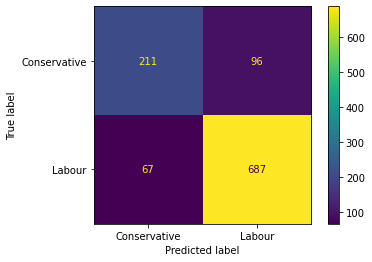

In [231]:
plot_confusion_matrix(tuned_knn, X_train, y_train)

AUC: 0.909


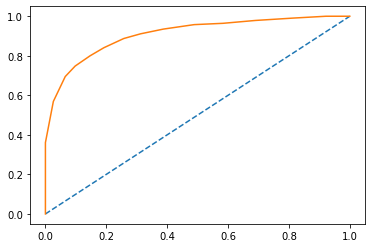

In [232]:
#AUC ROC Curve for training data for tuned_knn

# predict probabilities
probs = tuned_knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [233]:
## Performance Matrix on test data set
y_test_predict = tuned_knn.predict(X_test)
model_score = tuned_knn.score(X_test, y_test)
print(model_score)
print(classification_report(y_test, y_test_predict))

0.8421052631578947
              precision    recall  f1-score   support

Conservative       0.79      0.72      0.75       153
      Labour       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


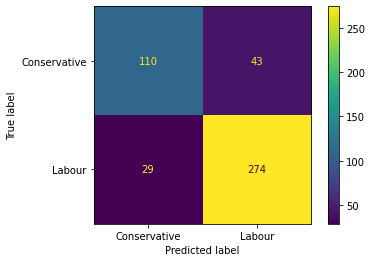

In [234]:
plot_confusion_matrix(tuned_knn, X_test, y_test)

AUC: 0.899


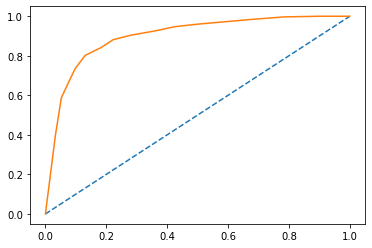

In [235]:
#AUC ROC Curve for testing data for tuned_knn

# predict probabilities
probs = tuned_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Random Forest Model

In [236]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=1)

In [237]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [238]:
#Performance measures on training data 
print(model_RF.score(X_train,y_train))
print(classification_report(y_train, model_RF.predict(X_train)))

1.0
              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       307
      Labour       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


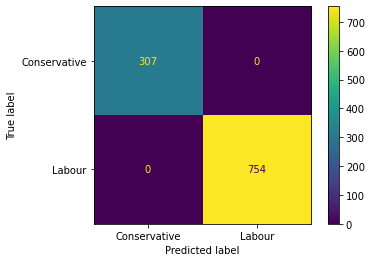

In [239]:
plot_confusion_matrix(model_RF, X_train, y_train)

AUC: 1.000


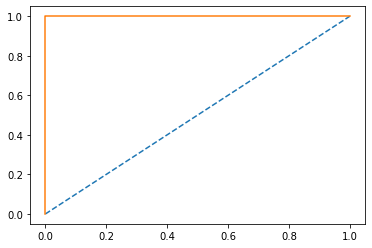

In [240]:
# predict probabilities
probs = model_RF.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [241]:
#Performance measures on testing data 
print(model_RF.score(X_test,y_test))
print(classification_report(y_test, model_RF.predict(X_test)))

0.831140350877193
              precision    recall  f1-score   support

Conservative       0.79      0.68      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


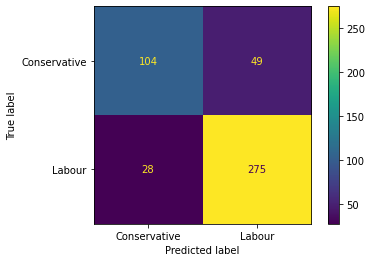

In [242]:
plot_confusion_matrix(model_RF, X_test, y_test)

AUC: 0.896


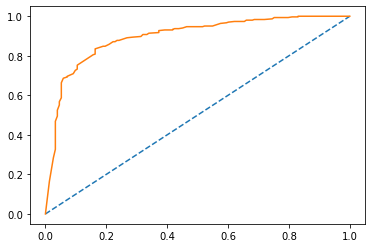

In [243]:
# predict probabilities
probs = model_RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<AxesSubplot:>

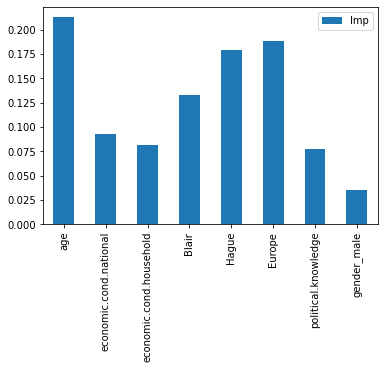

In [244]:
pd.DataFrame(model_RF.feature_importances_.T, columns=["Imp"], index=X_train.columns).plot(kind="bar")

#### Model tunning on Random Forest

In [245]:
model_RF = RandomForestClassifier(random_state=1)

In [246]:
grid_RF = {"n_estimators":[2,10,50,100],
          "criterion":["gini", "entropy"],
          "max_depth": [5,10,20],
          "min_samples_split": [2,5],
          "min_samples_leaf": [1,2,3],
          "max_features":["auto", "sqrt", "log2"]}

In [247]:
grid_search_RF = GridSearchCV(estimator = model_RF, param_grid = grid_RF, cv = 3,n_jobs=-1,scoring='accuracy')

In [248]:
grid_search_RF.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [2, 10, 50, 100]},
             scoring='accuracy')

In [249]:
grid_search_RF.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [250]:
tunned_RF=grid_search_RF.best_estimator_

In [251]:
#Performance measures on training data
print(tunned_RF.score(X_train, y_train))
print(classification_report(y_train, tunned_RF.predict(X_train)))

0.9057492931196984
              precision    recall  f1-score   support

Conservative       0.88      0.78      0.83       307
      Labour       0.91      0.96      0.94       754

    accuracy                           0.91      1061
   macro avg       0.90      0.87      0.88      1061
weighted avg       0.90      0.91      0.90      1061



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


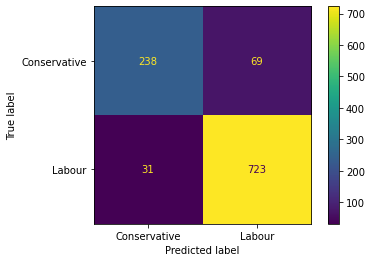

In [252]:
plot_confusion_matrix(tunned_RF, X_train, y_train)

AUC: 0.967


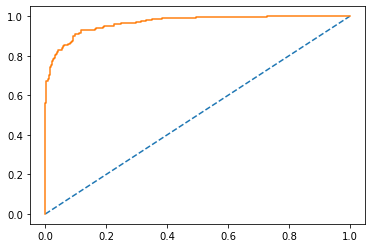

In [253]:
# predict probabilities
probs = tunned_RF.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [254]:
#Performance measures on testing data
print(tunned_RF.score(X_test, y_test))
print(classification_report(y_test, tunned_RF.predict(X_test)))

0.8399122807017544
              precision    recall  f1-score   support

Conservative       0.82      0.67      0.74       153
      Labour       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


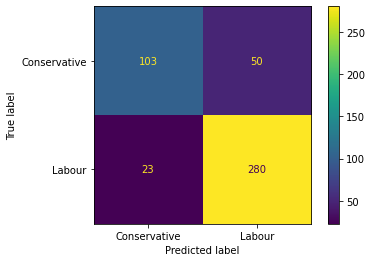

In [255]:
plot_confusion_matrix(tunned_RF, X_test,y_test)

AUC: 0.900


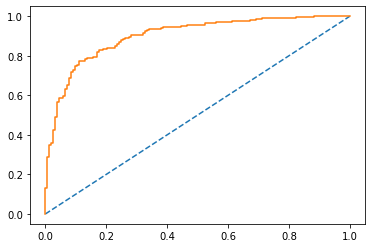

In [256]:
# predict probabilities
probs = tunned_RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_bin, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [257]:
tunned_RF.feature_importances_

array([0.15366074, 0.09730193, 0.05602099, 0.17389154, 0.21193489,
       0.20825192, 0.07277834, 0.02615966])

<AxesSubplot:>

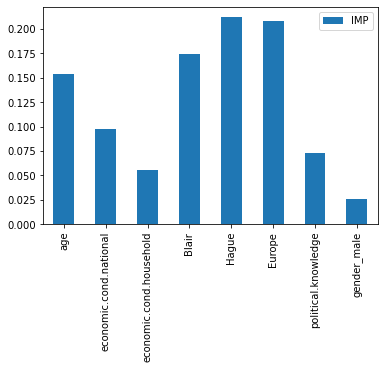

In [258]:
pd.DataFrame(tunned_RF.feature_importances_.T, columns=["IMP"], index=X_train.columns).plot(kind="bar")

## Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

- President Franklin D. Roosevelt in 1941
- President John F. Kennedy in 1961
- President Richard Nixon in 1973

In [1]:
import nltk
#nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

#### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)


In [260]:
#inaugural.raw('1941-Roosevelt.txt')

In [261]:
#Number of characters in each speech
print("Number of Characters in Roosevelt speech is %r " %len(inaugural.raw('1941-Roosevelt.txt')))
print("Number of Characters in Kennedy speech is %r " %len(inaugural.raw('1961-Kennedy.txt')))
print("Number of Characters in Nixon speech is %r " %len(inaugural.raw('1973-Nixon.txt')))

Number of Characters in Roosevelt speech is 7571 
Number of Characters in Kennedy speech is 7618 
Number of Characters in Nixon speech is 9991 


In [262]:
words_roosevelt = nltk.word_tokenize(inaugural.raw('1941-Roosevelt.txt'))
words_kennedy = nltk.word_tokenize(inaugural.raw('1961-Kennedy.txt'))
words_nixon = nltk.word_tokenize(inaugural.raw('1973-Nixon.txt'))

In [263]:
#Number of words in each speech
print("Number of words in Roosevelt speech is %d" %len(words_roosevelt))
print("Number of words in Kennedy speech is %d" %len(words_kennedy))
print("Number of words in Nixon speech is %d" %len(words_nixon))

Number of words in Roosevelt speech is 1526
Number of words in Kennedy speech is 1543
Number of words in Nixon speech is 2006


In [264]:
sent_roosevelt = nltk.sent_tokenize(inaugural.raw('1941-Roosevelt.txt'))
sent_kennedy = nltk.sent_tokenize(inaugural.raw('1961-Kennedy.txt'))
sent_nixon = nltk.sent_tokenize(inaugural.raw('1973-Nixon.txt'))

In [265]:
#Number of Sentences in each speech
print("Number of Sentences in Roosevelt speech is %d" %len(sent_roosevelt))
print("Number of Sentences in Kennedy speech is %d" %len(sent_kennedy))
print("Number of Sentences in Nixon speech is %d" %len(sent_nixon))

Number of Sentences in Roosevelt speech is 68
Number of Sentences in Kennedy speech is 52
Number of Sentences in Nixon speech is 68


#### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.


In [428]:
#Converting the words into lower case for each speech
all_words_roosevelt = [w.lower() for w in inaugural.words('1941-Roosevelt.txt')]
all_words_kennedy = [w.lower() for w in inaugural.words('1961-Kennedy.txt')]
all_words_nixon = [w.lower() for w in inaugural.words('1973-Nixon.txt')]

In [429]:
from nltk.corpus import stopwords
#nltk.download("stopwords")

In [460]:
import string
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stopwords_edit = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stopwords.append("--"),
stopwords.append('."')

In [6]:
#stopwords

In [462]:
stopwords_edit.remove(".")
stopwords_edit.append("--")

In [463]:
#Removal of stopwords from each speech
words_roosevelt = [word for word in all_words_roosevelt if word not in stopwords]
words_kennedy = [word for word in all_words_kennedy if word not in stopwords]
words_nixon = [word for word in all_words_nixon if word not in stopwords]

In [464]:
print("Number of clean words after removing stopwords and punctuations in Roosevelt Speech is %d" %len(words_roosevelt))
print("Number of clean words after removing stopwords and punctuations in Kennedy Speech is %d" %len(words_kennedy))
print("Number of clean words after removing stopwords and punctuations in Nixon Speech is %d" %len(words_nixon))

Number of clean words after removing stopwords and punctuations in Roosevelt Speech is 631
Number of clean words after removing stopwords and punctuations in Kennedy Speech is 696
Number of clean words after removing stopwords and punctuations in Nixon Speech is 835


In [466]:
clean_words_roosevelt = [word for word in all_words_roosevelt if word not in stopwords_edit]
clean_words_kennedy = [word for word in all_words_kennedy if word not in stopwords_edit]
clean_words_nixon = [word for word in all_words_nixon if word not in stopwords_edit]

In [467]:
roosevelt_speech=" ".join(clean_words_roosevelt)

In [468]:
roosevelt_speech=" ".join(clean_words_roosevelt)

In [469]:
len(nltk.sent_tokenize(roosevelt_speech))

68

In [470]:
nltk.sent_tokenize(roosevelt_speech)[0]

'national day inauguration since 1789 people renewed sense dedication united states .'

In [471]:
kennedy_speech=" ".join(clean_words_kennedy)

In [472]:
len(nltk.sent_tokenize(kennedy_speech))

50

In [473]:
nltk.sent_tokenize(kennedy_speech)[4]

'yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god .'

In [474]:
nixon_speech=" ".join(clean_words_nixon)

In [475]:
len(nltk.sent_tokenize(nixon_speech))

65

In [476]:
nltk.sent_tokenize(nixon_speech)[4]

'past year saw far reaching results new policies peace .'

#### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)


In [488]:
roosevelt_word_freq=nltk.FreqDist(words_roosevelt)

In [489]:
roosevelt_word_freq

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [490]:
print(list(roosevelt_word_freq))

['nation', 'know', 'spirit', 'life', 'democracy', 'us', 'people', 'america', 'years', 'freedom', 'human', 'men', 'new', 'body', 'mind', 'speaks', 'day', 'states', 'government', 'must', 'something', 'faith', 'united', 'task', 'within', 'history', 'nations', 'three', 'live', 'future', 'free', 'alone', 'still', 'every', 'continent', 'like', 'person', 'world', 'sacred', 'came', 'first', 'destiny', 'national', '1789', 'sense', 'washington', 'create', 'together', 'disruption', 'without', 'come', 'time', 'midst', 'stock', 'may', 'lives', 'little', 'measure', 'doubt', 'measured', 'americans', 'true', 'republic', 'acted', 'security', 'things', 'present', 'many', 'built', 'maintained', 'constitution', 'freely', 'american', 'seen', 'cannot', 'enterprise', 'forms', 'hopes', 'find', 'even', 'upon', 'early', 'peoples', 'written', 'land', 'could', 'forward', 'go', 'enough', 'would', 'seem', 'old', 'words', 'preservation', 'fire', 'inauguration', 'since', 'renewed', 'dedication', 'weld', 'lincoln', 'p

In [491]:
kennedy_word_freq=nltk.FreqDist(words_kennedy)

In [492]:
kennedy_word_freq

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [494]:
nixon_word_freq=nltk.FreqDist(words_nixon)

In [495]:
nixon_word_freq

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

#### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

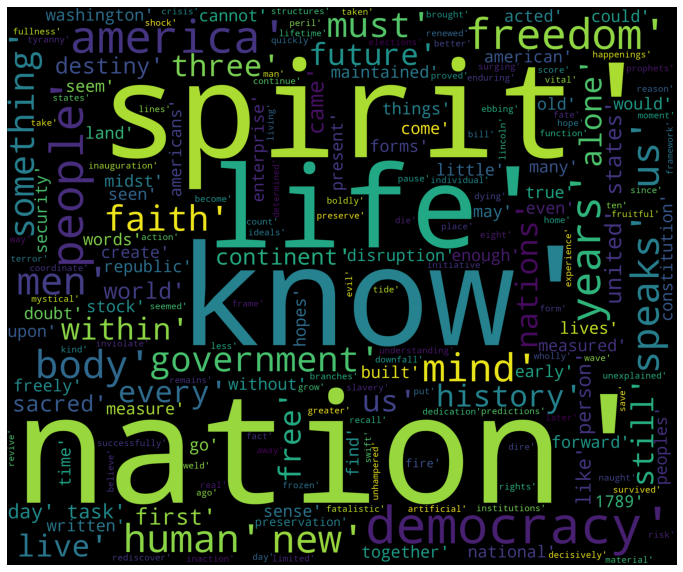

In [484]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500).generate(str(clean_words_roosevelt))
                      
                     
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

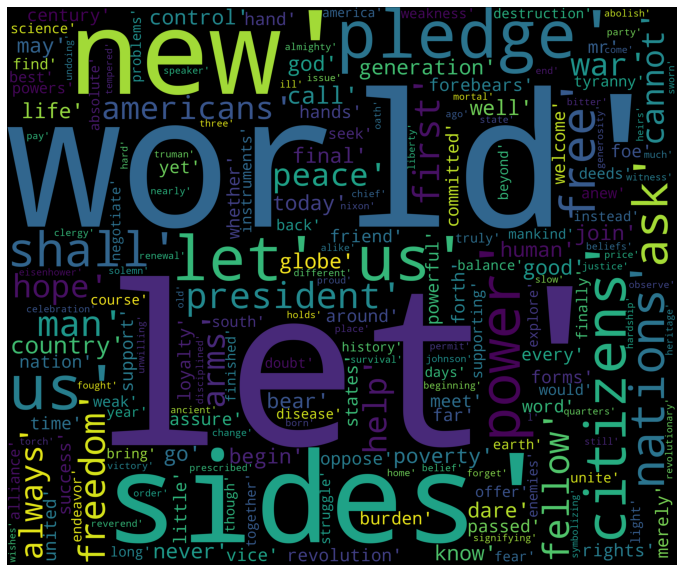

In [485]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500).generate(str(clean_words_kennedy))
                      
                     
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

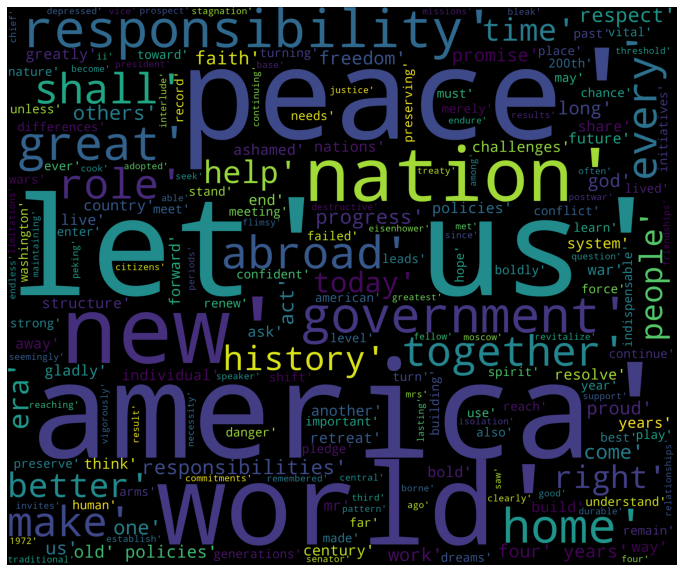

In [486]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500).generate(str(clean_words_nixon))
                      
                     
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()